In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
superheroes = pd.read_csv (r"/content/drive/MyDrive/BIA 652: Multivariate Data Analytics/superheroes_nlp_dataset.csv")
superheroes.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,40,70,"['Super Speed', 'Super Strength']",[],[''],NaN,NaN,Marvel Comics,Good,NaN,NaN,"['Annihilators', 'Asgardians', 'Avengers', 'Ne...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/10038.jpg?v=156096...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,35,100,"['Durability', 'Reflexes', 'Super Strength']","['Batgod', 'Batman', 'Batman (1966)', 'Batman ...","['Subject 514A', 'Bruce Wayne', 'Bruce 2']",NaN,NaN,DC Comics,NaN,NaN,NaN,[],Bruce Wayne (genetic template),NaN,NaN,-,-,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,100,80,"['Accelerated Healing', 'Agility', 'Berserk Mo...",[],['Rick Jones'],"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,Good,"Musician, adventurer, author; formerly talk sh...",NaN,"['Teen Brigade', 'Ultimate Fantastic Four', 'U...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,Male,Human,6'8 • 203 cm,980 lb • 441 kg,Yellow,No Hair,NaN,/pictures2/portraits/10/050/10060.jpg?v=158233...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,100,55,"['Energy Absorption', 'Energy Armor', 'Energy ...",[],[''],Stoneworld,Green Lantern Vol 3 #21,DC Comics,Good,NaN,NaN,"['Blue Lantern Corps', 'Green Lantern Corps', ...",NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1410.jpg?v=1581168103,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,30,50,"['Weapon-based Powers', 'Weapons Master']",[],[''],Gotham City,NaN,DC Comics,Good,NaN,NaN,[],NaN,Male,Human,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/11650.jpg?v=156173...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0

In [4]:
print(superheroes.shape)

(1450, 81)


In [5]:
superheroes.columns

Index(['name', 'real_name', 'full_name', 'overall_score', 'history_text',
       'powers_text', 'intelligence_score', 'strength_score', 'speed_score',
       'durability_score', 'power_score', 'combat_score', 'superpowers',
       'alter_egos', 'aliases', 'place_of_birth', 'first_appearance',
       'creator', 'alignment', 'occupation', 'base', 'teams', 'relatives',
       'gender', 'type_race', 'height', 'weight', 'eye_color', 'hair_color',
       'skin_color', 'img', 'has_electrokinesis', 'has_energy_constructs',
       'has_mind_control_resistance', 'has_matter_manipulation',
       'has_telepathy_resistance', 'has_mind_control', 'has_enhanced_hearing',
       'has_dimensional_travel', 'has_element_control', 'has_size_changing',
       'has_fire_resistance', 'has_fire_control', 'has_dexterity',
       'has_reality_warping', 'has_illusions', 'has_energy_beams',
       'has_peak_human_condition', 'has_shapeshifting', 'has_heat_resistance',
       'has_jump', 'has_self-sustenance', 'ha

In [6]:
superheroes['overall_score'].describe()

count     1450
unique      93
top          6
freq       162
Name: overall_score, dtype: object

# Extracting our dataset for DC Comics

In [11]:
print(superheroes['creator'].unique())

['ABC Studios' 'Blizzard Entertainment' 'Capcom' 'Cartoon Network'
 'Clive Barker' 'DC Comics' 'Dark Horse Comics' 'Disney' 'Dreamworks'
 'George Lucas' 'George R. R. Martin' 'Hanna-Barbera' 'HarperCollins'
 'Hasbro' 'IDW Publishing' 'Ian Fleming' 'Icon Comics' 'Image Comics'
 'J. K. Rowling' 'J. R. R. Tolkien' 'Konami' 'Lego' 'Marvel Comics'
 'Matt Groening' 'Mattel' 'Microsoft' 'Mortal Kombat' 'NBC - Heroes'
 'Namco' 'Nintendo' 'Sega' 'Shueisha' 'Sony Pictures' 'South Park'
 'Star Trek' 'Stephen King' 'SyFy' 'Team Epic TV' 'Ubisoft'
 'Universal Studios' 'Wildstorm' nan]


In [12]:
superheroes['creator'].value_counts()

Marvel Comics             615
DC Comics                 444
Shueisha                   37
Dark Horse Comics          29
Lego                       22
George Lucas               18
Image Comics               17
NBC - Heroes               16
Ubisoft                     9
J. R. R. Tolkien            8
J. K. Rowling               8
Wildstorm                   7
George R. R. Martin         7
Team Epic TV                6
SyFy                        6
HarperCollins               6
Capcom                      5
Mortal Kombat               4
ABC Studios                 4
Nintendo                    4
Icon Comics                 4
Star Trek                   4
Sony Pictures               3
Hasbro                      3
Disney                      3
Namco                       3
Cartoon Network             2
IDW Publishing              2
Clive Barker                2
Universal Studios           2
Matt Groening               1
South Park                  1
Microsoft                   1
Blizzard E

Extracting DC Comics superheroes for the scope of this project.

Reset Index to check later & be completely sure that the code did not miss out on any DC Comics superhero behind.

In [13]:
superheroes = superheroes.sort_values(by=['creator']).reset_index()
superheroes = superheroes.drop(columns=['index'])
superheroes.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,superpowers,alter_egos,aliases,place_of_birth,first_appearance,creator,alignment,occupation,base,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,...,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,Daphne Powell,Daphne Powell,Daphne Powell,4,"Daphne is a smart, pretty teenager with the lu...",NaN,70,10,10,10,55,10,['Telepathy'],[],[''],NaN,No Ordinary Family S01E01 (2010),ABC Studios,Good,Student,NaN,[],"Jim Powell and Stephanie Powell (parents), JJ...",Female,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1356.jpg?v=1286683361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,JJ Powell,JJ Powell,JJ Powell,7,JJ has lived with the knowledge that he's a di...,NaN,95,10,10,10,15,10,['Intelligence'],[],[''],NaN,No Ordinary Family S01E01 (2010),ABC Studios,Good,Student,NaN,[],"Jim Powell and Stephanie Powell (parents), Da...",Male,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1357.jpg?v=1286683065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Jim Powell,Jim Powell,Jim Powell,4,Jim is a failed artist turned police sketch ar...,NaN,70,40,25,80,25,20,"['Durability', 'Jump', 'Super Strength']",[],[''],NaN,No Ordinary Family S01E01 (2010),ABC Studios,Good,Police Sketch Artist,NaN,[],"Stephanie Powell (wife), Daphne Powell (duagh...",Male,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/10/050/1354.jpg?v=1286684869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,Stephanie Powell,Stephanie Powell,Stephanie Powell,6,As Global Tech's newest (and youngest!) Execut...,NaN,85,10,55,10,25,10,"['Accelerated Healing', 'Super Speed']",[],[''],NaN,No Ordinary Family S01E01 (2010),ABC Studios,Good,Executive Vice President of Research at Global...,NaN,[],"Jim Powell (husband), Daphne Powell (daughter...",Female,NaN,-,-,NaN,Blond,NaN,/pictures2/portraits/10/050/1355.jpg?v=1286686107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,A'dal,NaN,NaN,7,"As with most of the naaru, little is known of ...",NaN,85,30,70,55,65,100,"['Element Control', 'Heat Generation', 'Light ...",[],[''],"Terrace of Light, Shattrath City",NaN,Blizzard Entertainment,NaN,NaN,NaN,[],NaN,NaN,NaN,-,-,NaN,NaN,NaN,/pictures2/portraits/11/050/14754.jpg?v=156121...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
DC_Comics = superheroes.loc[superheroes['creator'] == 'DC Comics']

In [47]:
DC_Comics.shape

(444, 81)

# Exploratory Data Analysis & Data Cleaning

In [48]:
DC_Comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 14 to 457
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              444 non-null    object 
 1   real_name                         403 non-null    object 
 2   full_name                         275 non-null    object 
 3   overall_score                     444 non-null    object 
 4   history_text                      414 non-null    object 
 5   powers_text                       315 non-null    object 
 6   intelligence_score                444 non-null    int64  
 7   strength_score                    444 non-null    int64  
 8   speed_score                       444 non-null    int64  
 9   durability_score                  444 non-null    int64  
 10  power_score                       444 non-null    int64  
 11  combat_score                      444 non-null    int64  
 12  superpo

In [49]:
DC_Comics['powers_text'].isna().sum()

129

In [50]:
DC_Comics=DC_Comics.drop(columns=['real_name','full_name','history_text','powers_text','place_of_birth','first_appearance','creator','occupation','base','relatives','type_race','eye_color','hair_color','skin_color' ])

In [51]:
DC_Comics= DC_Comics.drop(columns=['superpowers',	'alter_egos','aliases','teams', 'alignment', 'gender', 'img'])
print(DC_Comics.shape)

(444, 60)


In [56]:
DC_Comics.isnull().sum().sum()

450

In [93]:
DC_Comics2 = DC_Comics

In [94]:
DC_Comics2 = DC_Comics2.dropna()
DC_Comics2.shape

(435, 60)

In [95]:
DC_Comics2.isnull().sum().sum()

0

In [96]:
DC_Comics2 = DC_Comics2.reset_index().drop(columns=['index'])

In [97]:
DC_Comics2['height'].head()

0     5'6 • 168 cm
1     5'7 • 170 cm
2    5'10 • 178 cm
3                -
4       0'1 • 3 cm
Name: height, dtype: object

In [98]:
Height_data = DC_Comics2['height']
Height_data = Height_data.str.extract(r'(\d+)\s*cm', expand=True)
Height_data.head()

,0
0,168
1,170
2,178
3,NaN
4,3


In [99]:
Weight_data = DC_Comics2['weight']
Weight_data = Weight_data.str.extract(r'(\d+)\s*kg', expand=True)
Weight_data.head()

,0
0,59
1,59
2,106
3,NaN
4,118


In [100]:
DC_Comics2['height_cm'] = Height_data
DC_Comics2['weight_kg'] = Weight_data
DC_Comics2 = DC_Comics2.drop(columns=['height', 'weight'])
DC_Comics2 = DC_Comics2.dropna()
DC_Comics2.head()

,name,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,has_telepathy_resistance,has_mind_control,has_enhanced_hearing,has_dimensional_travel,has_element_control,has_size_changing,has_fire_resistance,has_fire_control,has_dexterity,has_reality_warping,has_illusions,has_energy_beams,has_peak_human_condition,has_shapeshifting,has_heat_resistance,has_jump,has_self-sustenance,has_energy_absorption,has_cold_resistance,has_magic,has_telekinesis,has_toxin_and_disease_resistance,has_telepathy,has_regeneration,has_immortality,has_teleportation,has_force_fields,has_energy_manipulation,has_endurance,has_longevity,has_weapon-based_powers,has_energy_blasts,has_enhanced_senses,has_invulnerability,has_stealth,has_marksmanship,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength,height_cm,weight_kg
0,Black Canary (Injustice),9,95,20,50,45,50,100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,168,59
1,Black Canary,6,80,10,35,20,50,80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,170,59
2,Aqualad,7,80,45,40,75,90,60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,178,106
4,Aquagirl I,8,90,55,85,70,55,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3,118
6,Ventriloquist,6,85,10,15,15,20,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,63


In [101]:
DC_Comics2['height_cm'] = DC_Comics2['height_cm'].astype('int')
DC_Comics2['weight_kg'] = DC_Comics2['weight_kg'].astype('int')

In [102]:
DC_Comics2.shape

(322, 60)

In [103]:
Categorical_vars = ['has_electrokinesis','has_energy_constructs','has_mind_control_resistance','has_matter_manipulation','has_telepathy_resistance','has_mind_control',
                    'has_enhanced_hearing','has_dimensional_travel','has_element_control','has_size_changing','has_fire_resistance','has_fire_control','has_dexterity',
                    'has_reality_warping','has_illusions','has_energy_beams','has_peak_human_condition','has_shapeshifting','has_heat_resistance','has_jump','has_self-sustenance',
                    'has_energy_absorption','has_cold_resistance','has_magic','has_telekinesis','has_toxin_and_disease_resistance','has_telepathy','has_regeneration',
                    'has_immortality','has_teleportation','has_force_fields','has_energy_manipulation','has_endurance','has_longevity','has_weapon-based_powers',
                    'has_energy_blasts','has_enhanced_senses','has_invulnerability','has_stealth','has_marksmanship','has_flight','has_accelerated_healing','has_weapons_master',
                    'has_intelligence','has_reflexes','has_super_speed','has_durability','has_stamina','has_agility','has_super_strength']
DC_Comics2 = DC_Comics2.drop(columns= Categorical_vars)

In [104]:
DC_Comics2 = DC_Comics2.reset_index().drop(columns=['index'])
DC_Comics2.shape

(322, 10)

In [105]:
DC_Comics2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                322 non-null    object
 1   overall_score       322 non-null    object
 2   intelligence_score  322 non-null    int64 
 3   strength_score      322 non-null    int64 
 4   speed_score         322 non-null    int64 
 5   durability_score    322 non-null    int64 
 6   power_score         322 non-null    int64 
 7   combat_score        322 non-null    int64 
 8   height_cm           322 non-null    int64 
 9   weight_kg           322 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 25.3+ KB


# Preliminary Exploratory Data Analysis

There are observations in our y variable which are '∞'. This & other outliers need to be dealt with in order to train a good model.

In [106]:
i=321
while (i<322) & (i>-1):
  i = i-1
  if (DC_Comics2['overall_score'].iloc[i] == '∞'):
    print(i)

248


In [107]:
DC_Comics2 = DC_Comics2.drop(index=248)
DC_Comics2.shape

(321, 10)

In [108]:
DC_Comics2['overall_score'] = DC_Comics2['overall_score'].astype('int')

In [110]:
Column_Names = DC_Comics2.columns
Column_Names = ['name', 'height_cm', 'weight_kg', 'overall_score', 'intelligence_score', 'strength_score',
       'speed_score', 'durability_score', 'power_score', 'combat_score']

In [111]:
DC_Comics2 = DC_Comics2.reindex(columns=Column_Names)
DC_Comics2.head()

,name,height_cm,weight_kg,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,Black Canary (Injustice),168,59,9,95,20,50,45,50,100
1,Black Canary,170,59,6,80,10,35,20,50,80
2,Aqualad,178,106,7,80,45,40,75,90,60
3,Aquagirl I,3,118,8,90,55,85,70,55,75
4,Ventriloquist,0,63,6,85,10,15,15,20,25


In [112]:
DC_Comics2.describe(include=['int','object', 'category'])

,name,height_cm,weight_kg,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
count,321,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
unique,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Superboy-Prime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,181.015576,96.651090,12.068536,87.788162,40.919003,51.822430,60.280374,71.183801,77.009346
std,NaN,54.379193,70.184732,10.639621,10.251463,34.008450,27.480611,26.816784,28.320165,19.615760
min,NaN,0.000000,18.000000,1.000000,50.000000,0.000000,10.000000,10.000000,5.000000,10.000000
25%,NaN,170.000000,65.000000,7.000000,80.000000,10.000000,30.000000,40.000000,45.000000,70.000000
50%,NaN,180.000000,81.000000,9.000000,90.000000,30.000000,45.000000,60.000000,75.000000,80.000000
75%,NaN,188.000000,95.000000,13.000000,95.000000,75.000000,75.000000,85.000000,100.000000,90.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


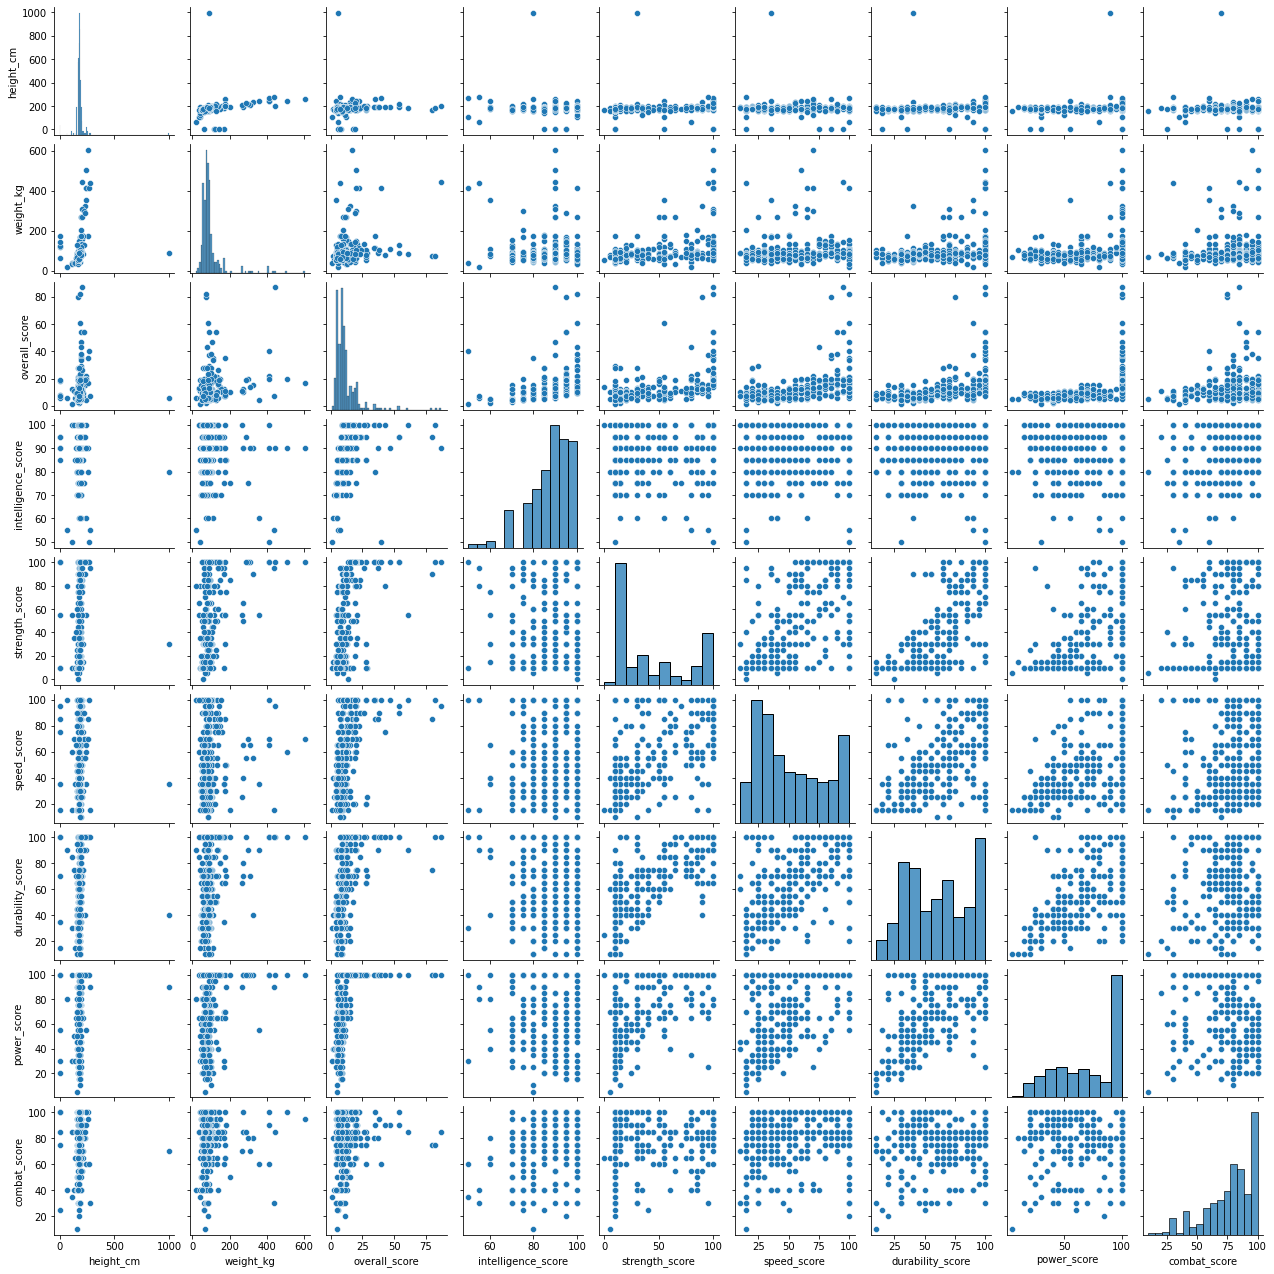

In [113]:
sns.pairplot(DC_Comics2.select_dtypes(include='int'), size=2)

Looks like height_cm, weight_kg, overall_score, intelligence_score, power_score & combat_score columns have outliers in them.

To confirm this:

In [114]:
DC_Comics2['height_cm'].describe()

count    321.000000
mean     181.015576
std       54.379193
min        0.000000
25%      170.000000
50%      180.000000
75%      188.000000
max      998.000000
Name: height_cm, dtype: float64

In [115]:
DC_Comics2['weight_kg'].describe()

count    321.000000
mean      96.651090
std       70.184732
min       18.000000
25%       65.000000
50%       81.000000
75%       95.000000
max      605.000000
Name: weight_kg, dtype: float64

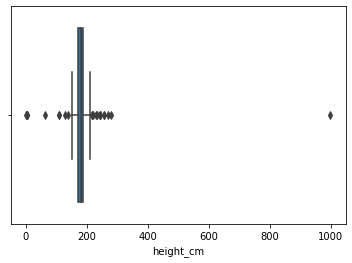

In [116]:
sns.boxplot(x=DC_Comics2['height_cm'])

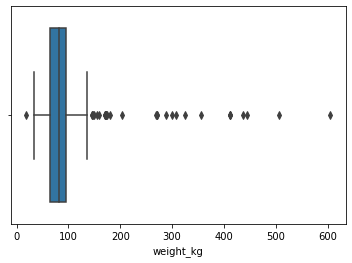

In [117]:
sns.boxplot(x=DC_Comics2['weight_kg'])

Using IQR to eliminate outliers

In [121]:
Q1 = DC_Comics2.quantile(0.25)
Q3 = DC_Comics2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

height_cm             18.0
weight_kg             30.0
overall_score          6.0
intelligence_score    15.0
strength_score        65.0
speed_score           45.0
durability_score      45.0
power_score           55.0
combat_score          20.0
dtype: float64


Now that we know the IQR for each column. We can use this to remove the outliers & keep only the data that is valid.

In [123]:
print(DC_Comics2.shape)
DC_Comics_Clean = DC_Comics2[~((DC_Comics2 < (Q1 - 1.5 *IQR)) | (DC_Comics2 > (Q3 + 1.5 * IQR))).any(axis=1)]
DC_Comics_Clean.shape

(321, 10)


(250, 10)

In [124]:
DC_Comics_Clean.head()

,name,height_cm,weight_kg,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,Black Canary (Injustice),168,59,9,95,20,50,45,50,100
1,Black Canary,170,59,6,80,10,35,20,50,80
2,Aqualad,178,106,7,80,45,40,75,90,60
6,Black Manta (DCEU),193,108,7,85,45,55,55,75,85
7,Black Manta,188,92,8,90,30,50,60,75,85


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


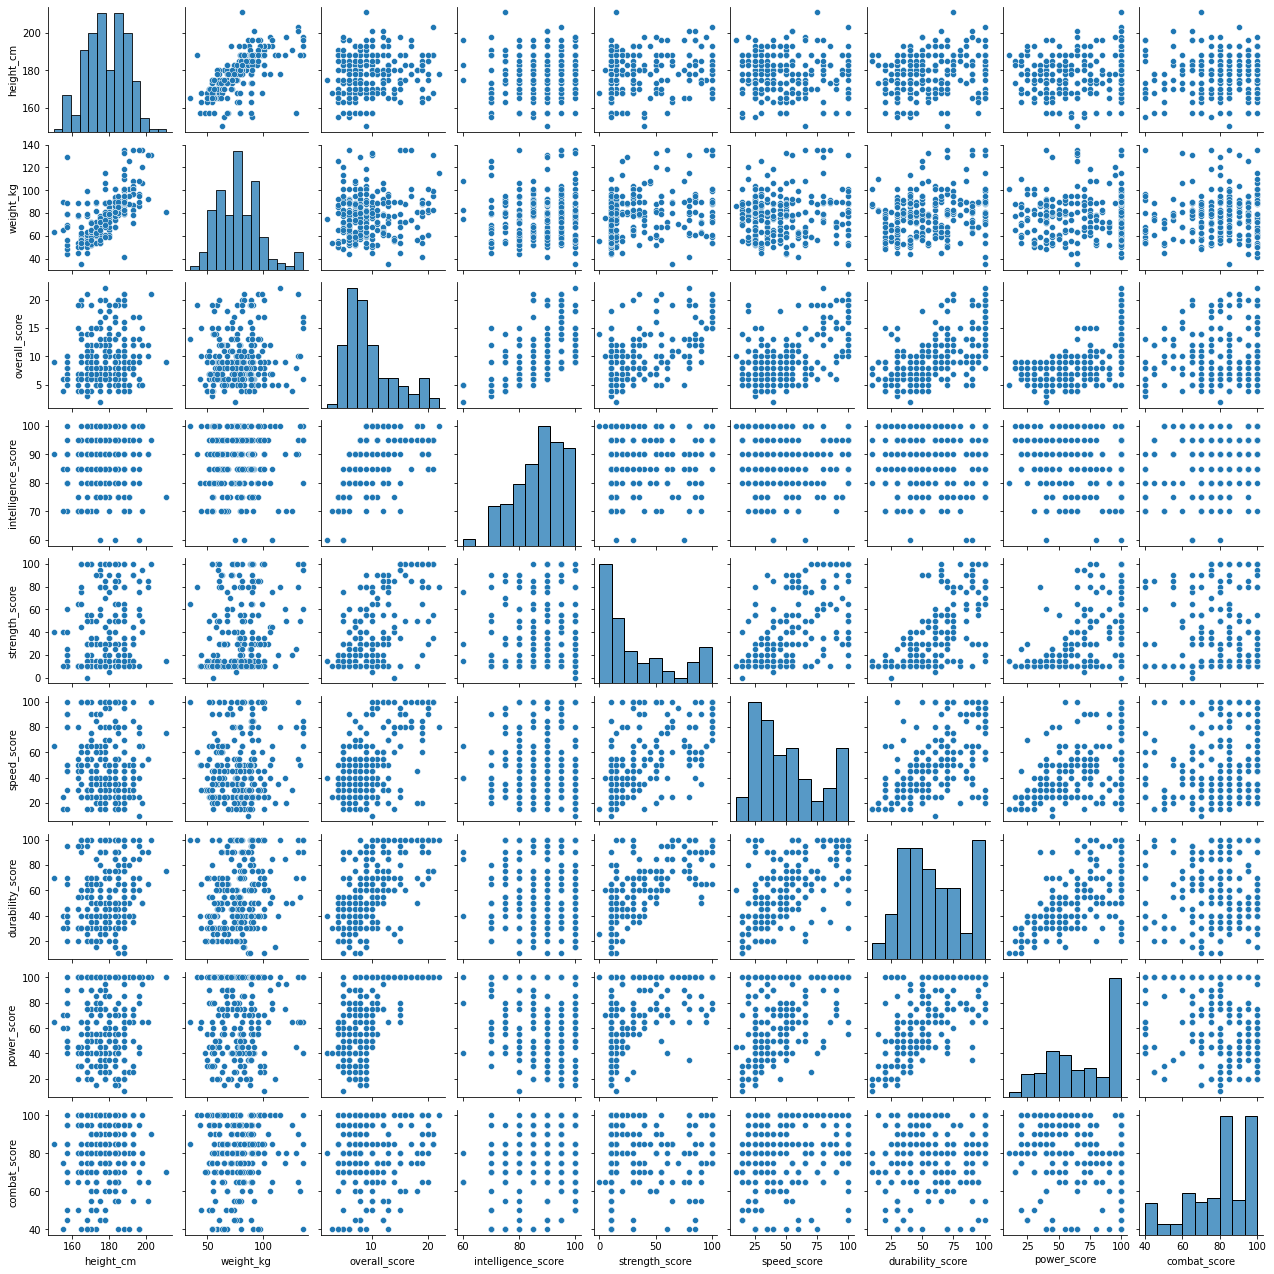

In [125]:
sns.pairplot(DC_Comics_Clean.select_dtypes(include='int'), size=2)

In [126]:
DC_Comics_Clean.shape

(250, 10)

The data looks way cleaner than before & workable

Checking for Co-Relation

In [130]:
DC_Comics_Clean.head()

,name,height_cm,weight_kg,overall_score,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score
0,Black Canary (Injustice),168,59,9,95,20,50,45,50,100
1,Black Canary,170,59,6,80,10,35,20,50,80
2,Aqualad,178,106,7,80,45,40,75,90,60
6,Black Manta (DCEU),193,108,7,85,45,55,55,75,85
7,Black Manta,188,92,8,90,30,50,60,75,85


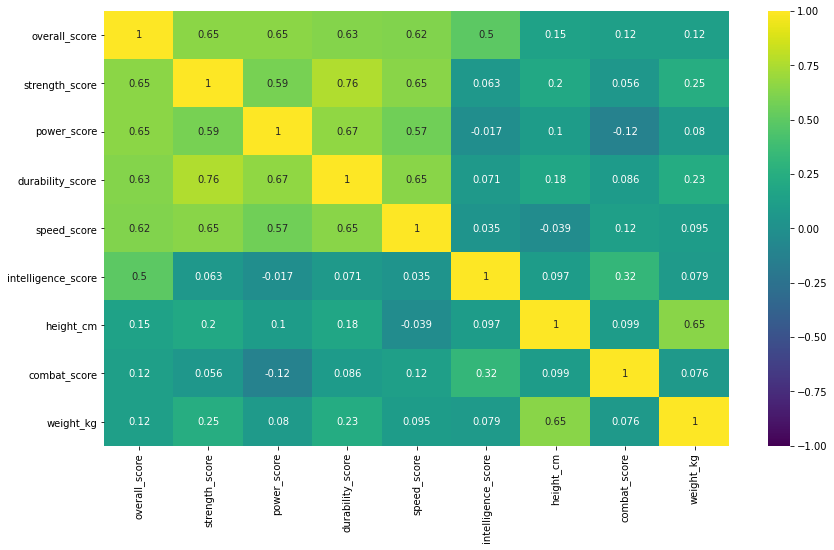

In [129]:
target_col = "overall_score"
X = DC_Comics_Clean.loc[:, DC_Comics_Clean.columns != target_col]
y = DC_Comics_Clean.loc[:, target_col]

k = 9 #number of variables for heatmap
cols = DC_Comics_Clean.corr().nlargest(k, target_col)[target_col].index
cm = DC_Comics_Clean[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis', vmin=-1, vmax=1)

In [131]:
DC_Comics_Clean = DC_Comics_Clean.drop(columns = 'weight_kg')

VIF on 'overall_score_x' wrt to integer Xs

In [134]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [135]:
%%capture
#gather features
features = "+".join(DC_Comics_Clean.columns.drop(['name','overall_score']))

# get y and X dataframes based on this regression:
y, X = dmatrices('overall_score ~' + features, DC_Comics_Clean, return_type='dataframe')

In [136]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [137]:
vif

,VIF Factor,features
0,390.512465,Intercept
1,1.133668,height_cm
2,1.123958,intelligence_score
3,2.768623,strength_score
4,2.194154,speed_score
5,3.145376,durability_score
6,2.081981,power_score
7,1.223122,combat_score


VIF looks good.
Lets perform a Multiple Linear Regression.

In [138]:
import statsmodels.api as sm

In [140]:
y = DC_Comics_Clean["overall_score"]
X = DC_Comics_Clean.drop(['name','overall_score'], axis=1)

In [141]:
X = sm.add_constant(X) # by default statsmodels does not add an intercept
# add a constant is the same as adding a column of 1 to X .
full_model = sm.OLS(y, X).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          overall_score   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     130.3
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.36e-78
Time:                        03:11:05   Log-Likelihood:                -529.58
No. Observations:                 250   AIC:                             1075.
Df Residuals:                     242   BIC:                             1103.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -18.9647      2.557     -7.418      0.000     -24.001     -13.929
height_cm              0.0124      0.013      0.946      0.345      -0.013       0.038
intelligence_score     0.2255      0.014     15.553      0.000       0.197       0.254
strength_score         0.0343      0.007      4.851      0.000       0.020       0.048
speed_score            0.0404      0.007      5.393      0.000       0.026       0.055
durability_score       0.0022      0.009      0.245      0.807      -0.016       0.020
power_score            0.0585      0.007      8.707      0.000       0.045       0.072
combat_score          -0.0087      0.009     -1.025      0.306      -0.025       0.008
==============================================================================
Omnibus:                       80.085   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.544
Skew:                           1.427   Prob(JB):                     7.80e-49
Kurtosis:                       6.623   Cond. No.                     4.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
DC_Comics_Clean = DC_Comics_Clean.drop(columns = 'durability_score')

In [143]:
DC_Comics_Clean.head()

,name,height_cm,overall_score,intelligence_score,strength_score,speed_score,power_score,combat_score
0,Black Canary (Injustice),168,9,95,20,50,50,100
1,Black Canary,170,6,80,10,35,50,80
2,Aqualad,178,7,80,45,40,90,60
6,Black Manta (DCEU),193,7,85,45,55,75,85
7,Black Manta,188,8,90,30,50,75,85


Linear Regression with train test split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 26)

In [146]:
from sklearn.linear_model import LinearRegression

In [147]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
y_pred = reg.predict(X_test)

In [149]:
reg.score(X_test,y_test)

0.7230155507563827

Cross Validation & lasso regression:

In [150]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(reg, X, y, cv=10)
cv_score

array([0.79002577, 0.86407911, 0.85238628, 0.7780246 , 0.79218388,
       0.8887238 , 0.74359614, 0.55525937, 0.47524077, 0.80913137])

In [151]:
np.mean(cv_score)

0.7548651096015278

In [152]:
from sklearn.linear_model import Lasso, LassoCV

In [153]:
model_lassoCV = LassoCV(cv=5, normalize=True)
model_lassoCV.fit(X_train, y_train)
model_lassoCV.alpha_

0.0037052067266386394

In [154]:
model_lasso = Lasso(alpha = 0.0037052067266386394, normalize=True)
model_lasso.fit(X_train, y_train)
lasso_pred = model_lasso.predict(X_test)
model_lasso.score(X_test,y_test)


0.7230788657302751

In [159]:
model_lasso.selection

'cyclic'

--------------------------End to code-------------------------